In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/home/codespace/.python/current/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_4851/3035051221.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [17]:

tokenizer = AutoTokenizer.from_pretrained('philschmid/BERT-Banking77')
model = AutoModelForSequenceClassification.from_pretrained('philschmid/BERT-Banking77')
classification_pipeline = pipeline('text-classification', model=model, tokenizer=tokenizer)

In [12]:
# Classify texts
texts = test_data['text'].tolist()
predictions = classification_pipeline(texts)

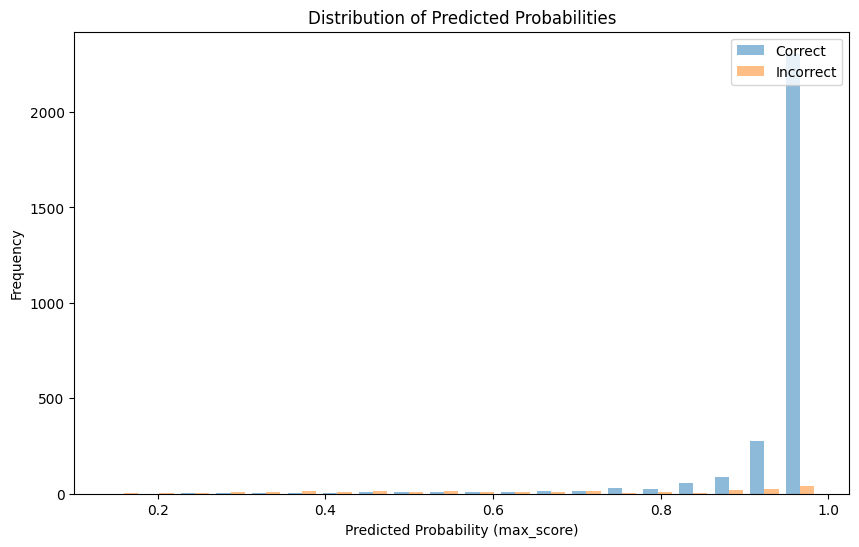

In [13]:
# Extract probabilities
predicted_labels = [pred['label'] for pred in predictions]  

# Extract actual categories from the test data
actual_categories = test_data['category'].tolist()

# Determine correctness
data = pd.read_csv('data/correct_or_not.csv')

# Filtering correct and incorrect predictions
correct_scores = data[data['correct'] == 1]['max_score']
incorrect_scores = data[data['correct'] == 0]['max_score']

# Plotting
plt.figure(figsize=(10, 6))
plt.hist([correct_scores, incorrect_scores], bins=20, alpha=0.5, label=['Correct', 'Incorrect'])
plt.xlabel('Predicted Probability (max_score)')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Distribution of Predicted Probabilities')
plt.show()

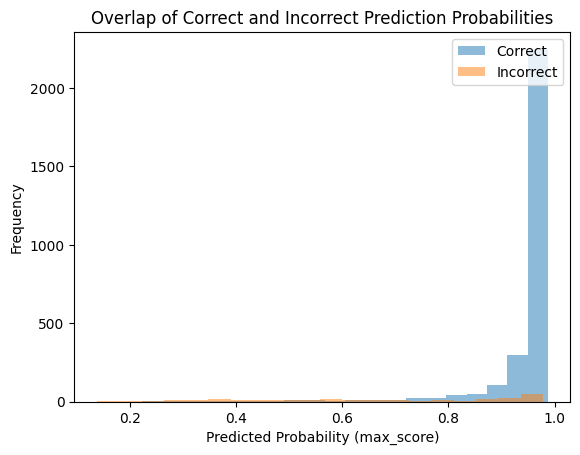

In [15]:
plt.hist(correct_scores, bins=20, alpha=0.5, label='Correct')
plt.hist(incorrect_scores, bins=20, alpha=0.5, label='Incorrect')
plt.xlabel('Predicted Probability (max_score)')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Overlap of Correct and Incorrect Prediction Probabilities')
plt.show()

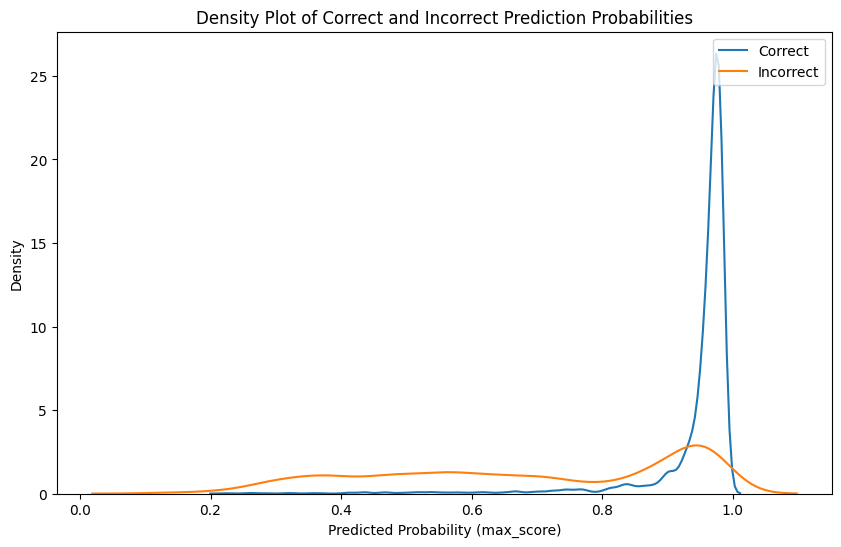

In [16]:
# Density Plot (KDE)
plt.figure(figsize=(10, 6))
sns.kdeplot(correct_scores, label="Correct", bw_adjust=0.5)
sns.kdeplot(incorrect_scores, label="Incorrect", bw_adjust=0.5)

plt.xlabel('Predicted Probability (max_score)')
plt.ylabel('Density')
plt.title('Density Plot of Correct and Incorrect Prediction Probabilities')
plt.legend(loc='upper right')
plt.show()


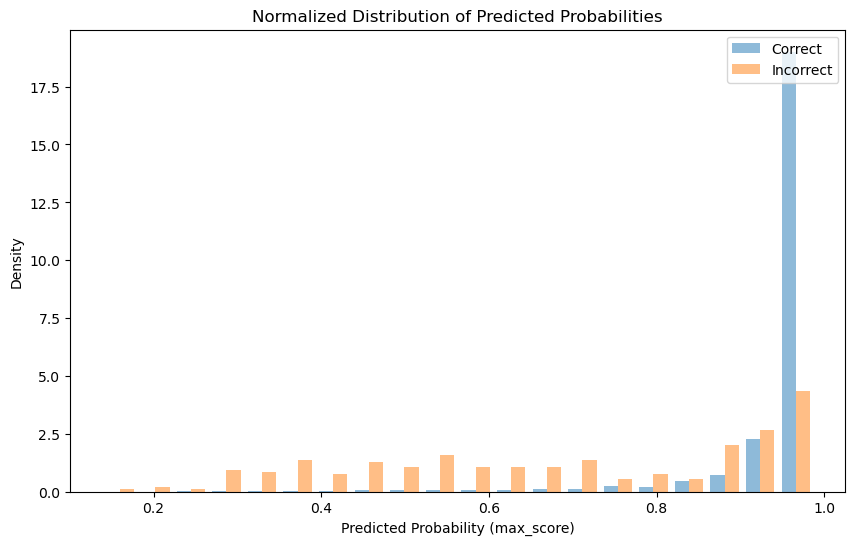

In [45]:
plt.figure(figsize=(10, 6))
plt.hist([correct_scores, incorrect_scores], bins=20, alpha=0.5, label=['Correct', 'Incorrect'], density=True)
plt.xlabel('Predicted Probability (max_score)')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.title('Normalized Distribution of Predicted Probabilities')
plt.show()


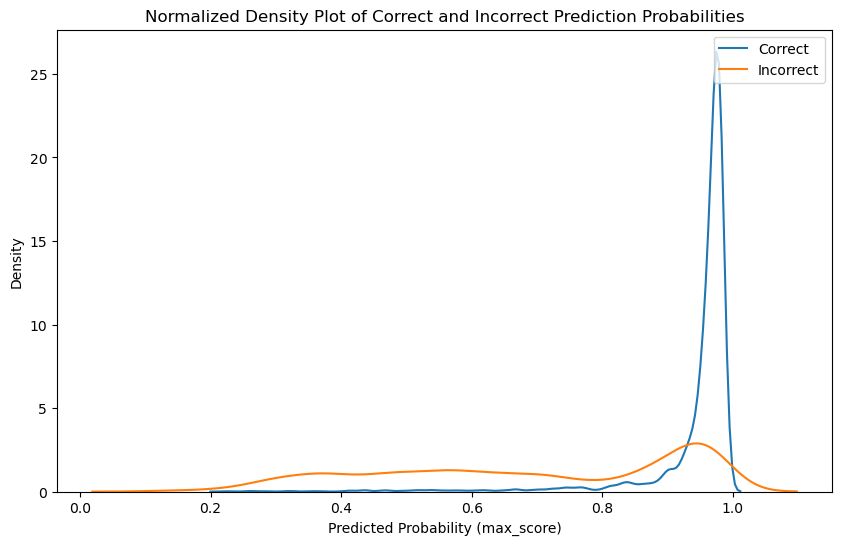

In [52]:
plt.figure(figsize=(10, 6))
sns.kdeplot(correct_scores, label="Correct", bw_adjust=0.5, common_norm=False)
sns.kdeplot(incorrect_scores, label="Incorrect", bw_adjust=0.5, common_norm=False)

plt.xlabel('Predicted Probability (max_score)')
plt.ylabel('Density')
plt.title('Normalized Density Plot of Correct and Incorrect Prediction Probabilities')
plt.legend(loc='upper right')
plt.show()